In [1]:
# Imports
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim

from sklearn import decomposition
from sklearn.datasets import fetch_openml
from helper_funcs import *

In [2]:
# Download MNIST
x_train, y_train, x_test, y_test = downloadMNIST()

x_train = x_train / 255
x_test = x_test / 255

image_shape = x_train.shape[1:]

input_size = np.prod(image_shape)

input_train = x_train.reshape([-1, input_size])
input_test = x_test.reshape([-1, input_size])

test_selected_idx = np.random.choice(len(x_test), 10, replace=False)
train_selected_idx = np.random.choice(len(x_train), 10, replace=False)

print(f'shape x_train \t\t {x_train.shape}')
print(f'shape x_test \t\t {x_test.shape}')
print(f'shape image \t\t {image_shape}')
print(f'shape input_train \t {input_train.shape}')
print(f'shape input_test \t {input_test.shape}')

shape x_train 		 torch.Size([60000, 28, 28])
shape x_test 		 torch.Size([10000, 28, 28])
shape image 		 torch.Size([28, 28])
shape input_train 	 torch.Size([60000, 784])
shape input_test 	 torch.Size([10000, 784])


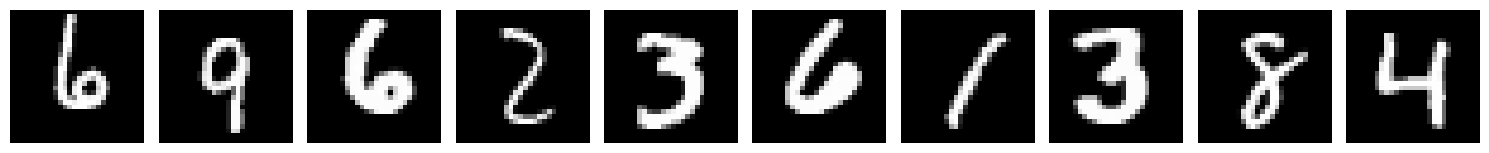

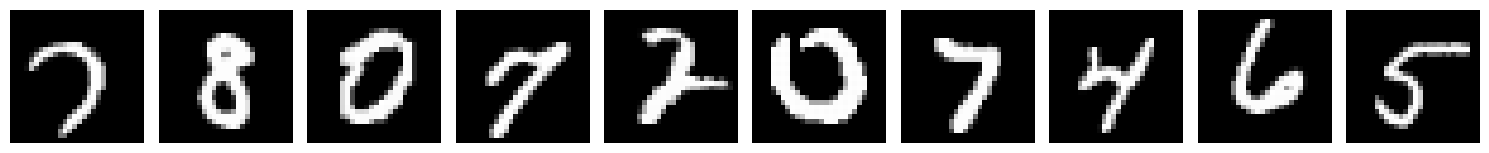

In [5]:
plot_row([x_test, x_test[test_selected_idx]])

## Coding Exercise 1: Visualize PCA latent space (2D)

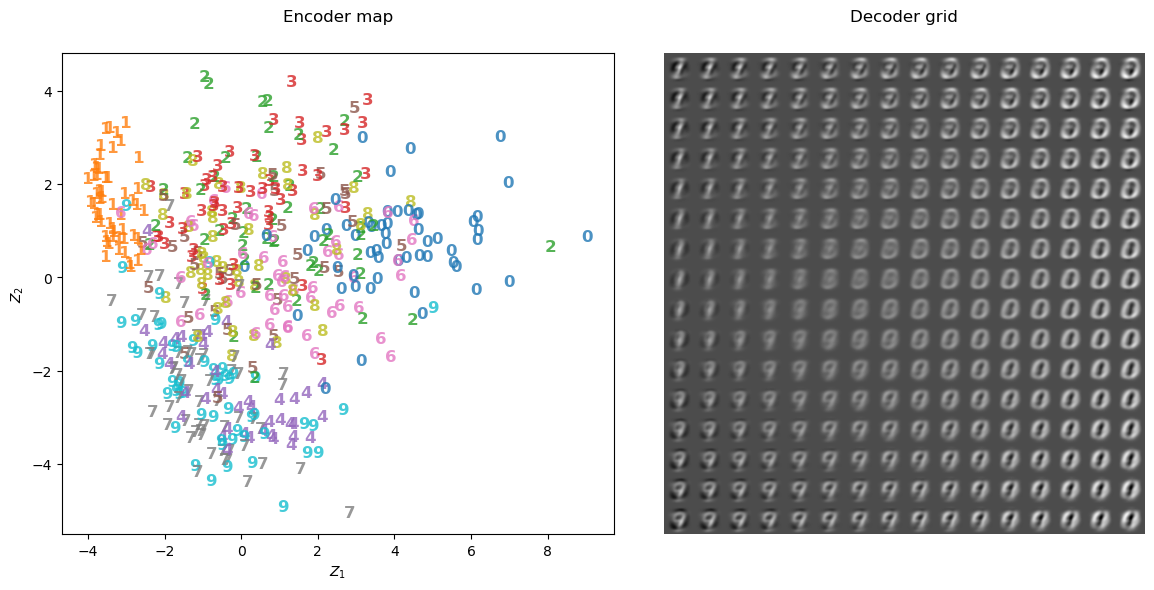

In [6]:
####################################################
## TODO for students: perform PCA and visualize latent space and reconstruction
# raise NotImplementedError("Complete the make_design_matrix function")
#####################################################################
# create the model
pca = decomposition.PCA(n_components=2, random_state=20)
# fit the model on training data
pca.fit(input_train)
# transformation on 2D space
pca_latent_test = pca.transform(input_test)

plot_latent_generative(pca_latent_test, y_test, pca.inverse_transform,
                       image_shape=image_shape)

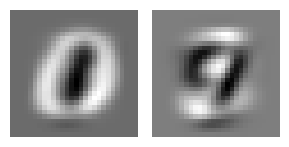

In [8]:
pca_components = pca.components_
plot_row(pca_components, image_shape=image_shape)

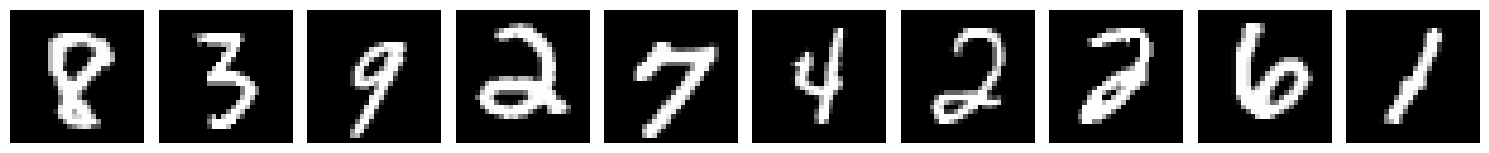

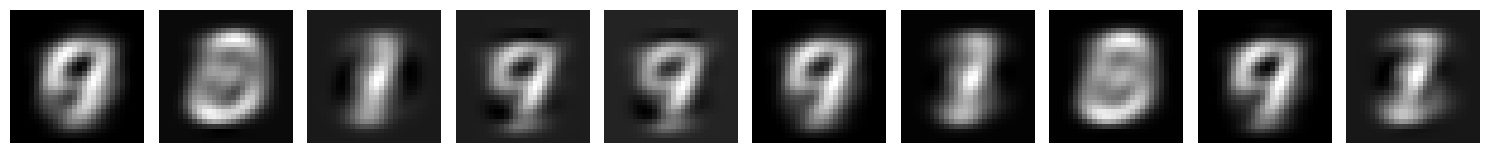

In [9]:
pca_output_test = pca.inverse_transform(pca_latent_test)

plot_row([input_test, pca_output_test], image_shape=image_shape)

## Coding Exercise 2: Design ANN autoencoder

In [10]:
encoding_size = 32

######################################################################
## TODO for students: add linear and sigmoid layers
# raise NotImplementedError("Complete the make_design_matrix function")
#####################################################################
model = nn.Sequential(
    nn.Linear(input_size, encoding_size),
    nn.ReLU(),
    # insert your code here to add the layer
    # nn.Linear(...),
    # insert the activation function
    # ....
    nn.Linear(encoding_size, input_size),
    nn.Sigmoid()
    )

print(f'Model structure \n\n {model}')

Model structure 

 Sequential(
  (0): Linear(in_features=784, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=784, bias=True)
  (3): Sigmoid()
)


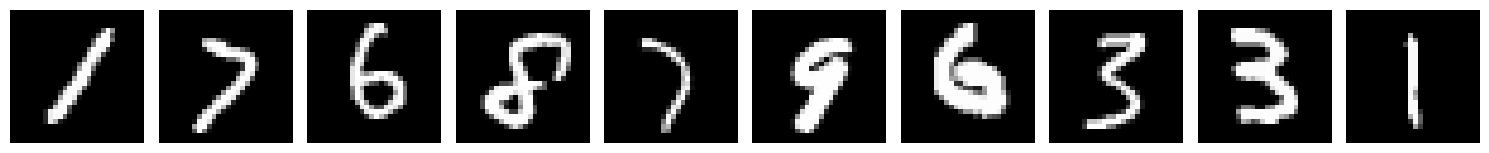

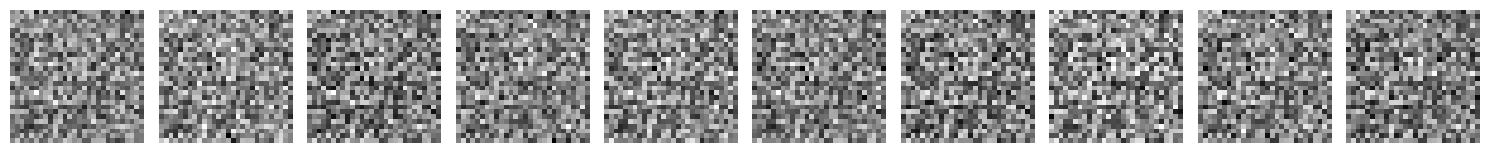

In [11]:
with torch.no_grad():
  output_test = model(input_test)

plot_row([input_test.float(), output_test], image_shape=image_shape)

Epoch 	 Loss train 	 Loss test
1 / 10	 0.0282		 0.0278
2 / 10	 0.0207		 0.0203
3 / 10	 0.0179		 0.0175
4 / 10	 0.0168		 0.0164
5 / 10	 0.0164		 0.0160
6 / 10	 0.0163		 0.0159
7 / 10	 0.0162		 0.0157
8 / 10	 0.0160		 0.0156
9 / 10	 0.0160		 0.0156
10 / 10	 0.0160		 0.0155


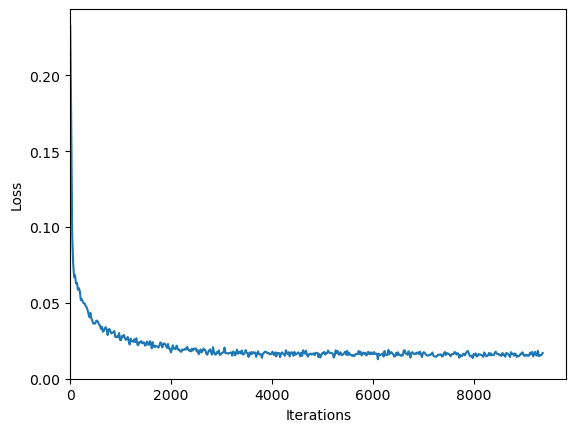

In [12]:
encoding_size = 32

model = nn.Sequential(
    nn.Linear(input_size, encoding_size),
    nn.ReLU(),
    nn.Linear(encoding_size, input_size),
    nn.Sigmoid()
    )

n_epochs = 10
batch_size = 64

runSGD(model, input_train, input_test, criterion='mse',
       n_epochs=n_epochs, batch_size=batch_size)

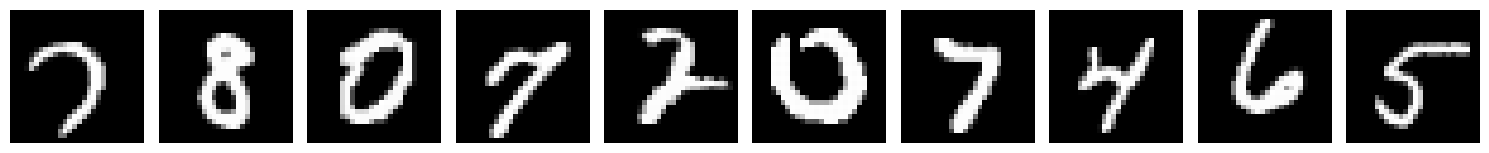

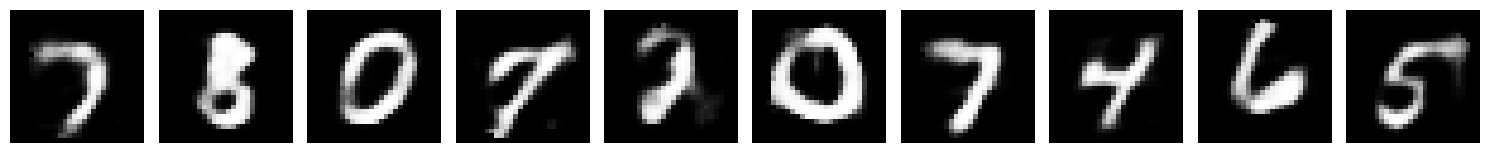

In [13]:
with torch.no_grad():
  output_test = model(input_test)

plot_row([input_test[test_selected_idx], output_test[test_selected_idx]],
         image_shape=image_shape)